<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/btc_period_and_prediction_calculate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from my_func_pkg import one_dimension_data,find_pivot,blind_boundary_exp_smooth_curve,most_frequency_cenarios
import yfinance as yf

In [2]:
fbpdov0=pd.read_csv("/content/fbpdov.csv")
fbpdun0=pd.read_csv("/content/fbpdun .csv")

In [3]:
fbpdov1=fbpdov0.iloc[:,1].values
fbpdun1=fbpdun0.iloc[:,1].values

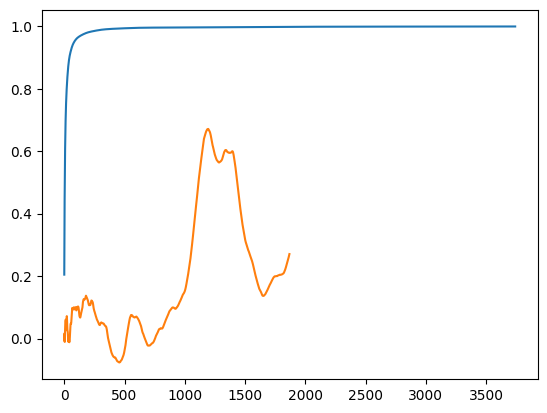

In [4]:
plt.plot(fbpdov1)
plt.plot(fbpdun1)

In [5]:
fp=find_pivot(fbpdun1)

In [6]:
fp[0]

array([  21,  114,  180,  226,  305,  556,  597,  900, 1192, 1339, 1395])

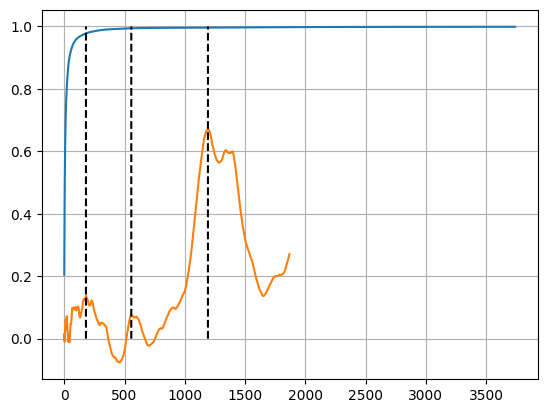

In [7]:
plt.plot(fbpdov1)
plt.plot(fbpdun1)
plt.plot([180]*(len(fbpdov1)+len(fbpdun1)),np.linspace(0,1,len(fbpdov1)+len(fbpdun1)),linestyle='--',c='black')
plt.plot([556]*(len(fbpdov1)+len(fbpdun1)),np.linspace(0,1,len(fbpdov1)+len(fbpdun1)),linestyle='--',c='black')
plt.plot([1192]*(len(fbpdov1)+len(fbpdun1)),np.linspace(0,1,len(fbpdov1)+len(fbpdun1)),linestyle='--',c='black')
plt.grid()
plt.show()

In [11]:
btc=yf.download("BTC-USD")

[*********************100%***********************]  1 of 1 completed


In [12]:
bbesc180=blind_boundary_exp_smooth_curve(btc.Close.values,180)

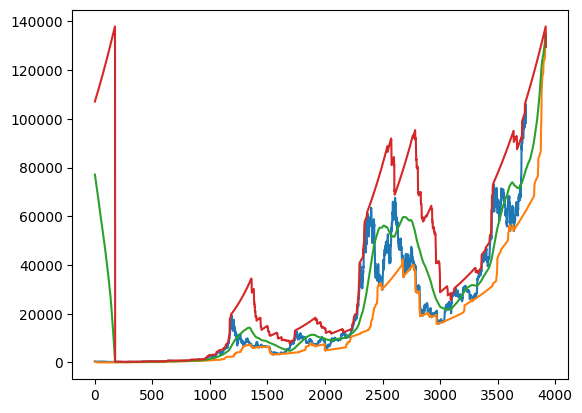

In [15]:
plt.plot(btc.Close.values)
plt.plot(bbesc180)
plt.show()

In [31]:
mfc180=most_frequency_cenarios(btc.Close.values,nbins=20,ngreater=0.95)

100%|██████████| 100/100 [00:28<00:00,  3.47it/s]


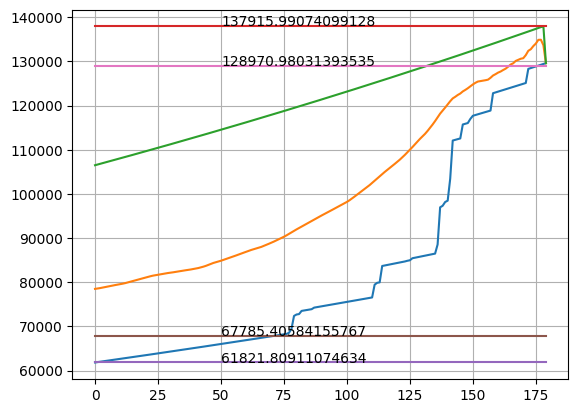

In [32]:
plt.plot(bbesc180[-180:])
plt.plot([np.max(bbesc180[-180:])]*180)
plt.plot([np.min(bbesc180[-180:])]*180)
plt.text(x=50,y=np.max(bbesc180[-180:])+100,s=f'{np.max(bbesc180[-180:])}')
plt.text(x=50,y=np.min(bbesc180[-180:])-100,s=f'{np.min(bbesc180[-180:])}')
plt.plot([mfc180[0]]*180)
plt.plot([mfc180[-1]]*180)
plt.text(x=50,y=mfc180[0],s=f'{mfc180[0]}')
plt.text(x=50,y=mfc180[-1],s=f'{mfc180[-1]}')
plt.grid()
plt.show()

In [35]:
bbesc1192=blind_boundary_exp_smooth_curve(btc.Close.values,1192)

In [34]:
mfc1192=most_frequency_cenarios(btc.Close.values,nbins=20,ngreater=0.95)

100%|██████████| 100/100 [00:46<00:00,  2.14it/s]


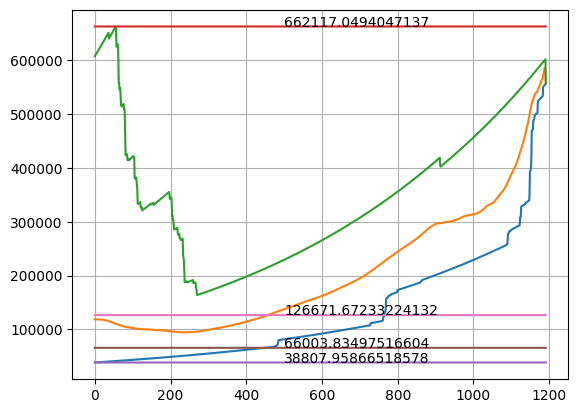

In [36]:
plt.plot(bbesc1192[-1192:])
plt.plot([np.max(bbesc1192[-1192:])]*1192)
plt.plot([np.min(bbesc1192[-1192:])]*1192)
plt.text(x=500,y=np.max(bbesc1192[-1192:])+100,s=f'{np.max(bbesc1192[-1192:])}')
plt.text(x=500,y=np.min(bbesc1192[-1192:])-100,s=f'{np.min(bbesc1192[-1192:])}')
plt.plot([mfc1192[0]]*1192)
plt.plot([mfc1192[-1]]*1192)
plt.text(x=500,y=mfc1192[0],s=f'{mfc1192[0]}')
plt.text(x=500,y=mfc1192[-1],s=f'{mfc1192[-1]}')
plt.grid()
plt.show()

In [37]:
pd.DataFrame(mfc180).to_csv("btcmfc180.csv")
pd.DataFrame(mfc1192).to_csv("btcmfc1192.csv")

In [38]:
pd.DataFrame(bbesc180).to_csv("btcbbesc180.csv")
pd.DataFrame(bbesc1192).to_csv("btcbbesc1192.csv")